In [1]:
# importing libraries

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [45]:
# import data

data = pd.read_csv("cardiotocographic.csv")

In [46]:
# describing the dataset

data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [47]:
# checking the data structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
LB          2126 non-null int64
AC          2126 non-null float64
FM          2126 non-null float64
UC          2126 non-null float64
DL          2126 non-null float64
DS          2126 non-null float64
DP          2126 non-null float64
ASTV        2126 non-null int64
MSTV        2126 non-null float64
ALTV        2126 non-null int64
MLTV        2126 non-null float64
Width       2126 non-null int64
Min         2126 non-null int64
Max         2126 non-null int64
Nmax        2126 non-null int64
Nzeros      2126 non-null int64
Mode        2126 non-null int64
Mean        2126 non-null int64
Median      2126 non-null int64
Variance    2126 non-null int64
Tendency    2126 non-null int64
NSP         2126 non-null int64
dtypes: float64(8), int64(14)
memory usage: 365.5 KB


In [48]:
# checking the head of the data

data.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [51]:
# splitting train and test data

from sklearn.model_selection import train_test_split

x= data.drop('NSP', axis= 1)
y= data['NSP']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=232)

In [56]:
# one hot encoding

from keras.utils import to_categorical

y_train= y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
# preprocessing of the data

from sklearn import preprocessing

x_train= preprocessing.normalize(x_train)
x_test= preprocessing.normalize(x_test)

array([[ 3.67549718e-01,  2.39568986e-05,  2.99461265e-06, ...,
         3.88703659e-01,  1.87741223e-01,  2.64424258e-03],
       [ 3.75556761e-01,  4.74907485e-06,  3.79925894e-05, ...,
         3.91204959e-01,  1.56481984e-02, -3.12963967e-03],
       [ 4.03276404e-01,  0.00000000e+00,  0.00000000e+00, ...,
         4.06477010e-01,  6.40121276e-03,  0.00000000e+00],
       ...,
       [ 2.91289229e-01,  6.96253549e-06,  0.00000000e+00, ...,
         2.83344977e-01,  9.26829364e-02, -2.64808390e-03],
       [ 3.54945168e-01,  2.49835720e-05,  1.10641531e-04, ...,
         3.98630727e-01,  4.64159066e-02,  2.73034745e-03],
       [ 3.76397501e-01,  0.00000000e+00,  0.00000000e+00, ...,
         4.09459444e-01,  0.00000000e+00,  2.54322636e-03]])

In [113]:
# initialize the keras sequential model

model = Sequential()

In [114]:
# creating the structure of the model
# we have 3 hidden layer with input and output layer

model.add(Dense(50, activation= 'relu', input_shape= (21,)))
model.add(Dense(42, activation= 'relu'))
model.add(Dense(35, activation= 'relu'))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(3, activation= 'softmax'))

In [115]:
# compilling and fitting the model
# we will use Stochastic gradient descent optimizer with .01, 0.03, 0.05, 0.07, 0.2, 0.3 learning rate.
# we will create a eanly stopping function with patience 35 if our epoch doesn't show any learning behaviour.

from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience= 35)

# Create list of learning rates: lr_to_test

lr_to_test = [.01, 0.03, 0.05, 0.07, 0.2, 0.3]

for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    
    my_optimizer = SGD(lr= lr)
    
    # compilling model
    
    model.compile(optimizer= my_optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    # fitting model
    
    history= model.fit(x_train, y_train, validation_split= .2, epochs= 250, callbacks= [early_stopping_monitor])



Testing model with learning rate: 0.010000

Train on 1275 samples, validate on 319 samples
Epoch 1/250
1275/1275 [==============================] - 1s 1ms/step - loss: 1.0066 - acc: 0.7192 - val_loss: 0.9230 - val_acc: 0.7743
Epoch 2/250
1275/1275 [==============================] - 0s 88us/step - loss: 0.8597 - acc: 0.7749 - val_loss: 0.7979 - val_acc: 0.7743
Epoch 3/250
1275/1275 [==============================] - 0s 82us/step - loss: 0.7687 - acc: 0.7749 - val_loss: 0.7351 - val_acc: 0.7743
Epoch 4/250
1275/1275 [==============================] - 0s 80us/step - loss: 0.7238 - acc: 0.7749 - val_loss: 0.7053 - val_acc: 0.7743
Epoch 5/250
1275/1275 [==============================] - 0s 82us/step - loss: 0.7033 - acc: 0.7749 - val_loss: 0.6934 - val_acc: 0.7743
Epoch 6/250
1275/1275 [==============================] - 0s 76us/step - loss: 0.6937 - acc: 0.7749 - val_loss: 0.6877 - val_acc: 0.7743
Epoch 7/250
1275/1275 [==============================] - 0s 75us/step - loss: 0.6884 - acc: 

1275/1275 [==============================] - 0s 77us/step - loss: 0.5851 - acc: 0.7749 - val_loss: 0.5885 - val_acc: 0.7743
Epoch 61/250
1275/1275 [==============================] - 0s 82us/step - loss: 0.5795 - acc: 0.7749 - val_loss: 0.5840 - val_acc: 0.7743
Epoch 62/250
1275/1275 [==============================] - 0s 79us/step - loss: 0.5744 - acc: 0.7749 - val_loss: 0.5769 - val_acc: 0.7743
Epoch 63/250
1275/1275 [==============================] - 0s 64us/step - loss: 0.5684 - acc: 0.7749 - val_loss: 0.5701 - val_acc: 0.7743
Epoch 64/250
1275/1275 [==============================] - 0s 67us/step - loss: 0.5628 - acc: 0.7749 - val_loss: 0.5686 - val_acc: 0.7743
Epoch 65/250
1275/1275 [==============================] - 0s 69us/step - loss: 0.5582 - acc: 0.7749 - val_loss: 0.5583 - val_acc: 0.7743
Epoch 66/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.5507 - acc: 0.7741 - val_loss: 0.5500 - val_acc: 0.7743
Epoch 67/250
1275/1275 [==============================

Epoch 120/250
1275/1275 [==============================] - 0s 76us/step - loss: 0.3890 - acc: 0.8533 - val_loss: 0.4672 - val_acc: 0.8276
Epoch 121/250
1275/1275 [==============================] - 0s 71us/step - loss: 0.3943 - acc: 0.8463 - val_loss: 0.3757 - val_acc: 0.8339
Epoch 122/250
1275/1275 [==============================] - 0s 70us/step - loss: 0.3960 - acc: 0.8408 - val_loss: 0.3650 - val_acc: 0.8589
Epoch 123/250
1275/1275 [==============================] - 0s 71us/step - loss: 0.3909 - acc: 0.8486 - val_loss: 0.3679 - val_acc: 0.8464
Epoch 124/250
1275/1275 [==============================] - 0s 79us/step - loss: 0.3899 - acc: 0.8447 - val_loss: 0.3616 - val_acc: 0.8527
Epoch 125/250
1275/1275 [==============================] - 0s 67us/step - loss: 0.3885 - acc: 0.8557 - val_loss: 0.3756 - val_acc: 0.8339
Epoch 126/250
1275/1275 [==============================] - 0s 78us/step - loss: 0.3921 - acc: 0.8463 - val_loss: 0.3638 - val_acc: 0.8464
Epoch 127/250
1275/1275 [=========

1275/1275 [==============================] - 0s 82us/step - loss: 0.3653 - acc: 0.8533 - val_loss: 0.3419 - val_acc: 0.8715
Epoch 180/250
1275/1275 [==============================] - 0s 73us/step - loss: 0.3675 - acc: 0.8525 - val_loss: 0.3420 - val_acc: 0.8715
Epoch 181/250
1275/1275 [==============================] - 0s 78us/step - loss: 0.3653 - acc: 0.8502 - val_loss: 0.3420 - val_acc: 0.8683
Epoch 182/250
1275/1275 [==============================] - 0s 83us/step - loss: 0.3639 - acc: 0.8541 - val_loss: 0.3410 - val_acc: 0.8840
Epoch 183/250
1275/1275 [==============================] - 0s 68us/step - loss: 0.3639 - acc: 0.8588 - val_loss: 0.3514 - val_acc: 0.8715
Epoch 184/250
1275/1275 [==============================] - 0s 76us/step - loss: 0.3663 - acc: 0.8502 - val_loss: 0.3485 - val_acc: 0.8652
Epoch 185/250
1275/1275 [==============================] - 0s 69us/step - loss: 0.3611 - acc: 0.8533 - val_loss: 0.4060 - val_acc: 0.8213
Epoch 186/250
1275/1275 [=======================

1275/1275 [==============================] - 0s 85us/step - loss: 0.3603 - acc: 0.8533 - val_loss: 0.3462 - val_acc: 0.8652
Epoch 239/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3542 - acc: 0.8612 - val_loss: 0.3803 - val_acc: 0.8401
Epoch 240/250
1275/1275 [==============================] - 0s 81us/step - loss: 0.3609 - acc: 0.8659 - val_loss: 0.3261 - val_acc: 0.8809
Epoch 241/250
1275/1275 [==============================] - 0s 83us/step - loss: 0.3497 - acc: 0.8557 - val_loss: 0.3418 - val_acc: 0.8715
Epoch 242/250
1275/1275 [==============================] - 0s 67us/step - loss: 0.3525 - acc: 0.8604 - val_loss: 0.3318 - val_acc: 0.8809
Epoch 243/250
1275/1275 [==============================] - 0s 67us/step - loss: 0.3571 - acc: 0.8565 - val_loss: 0.3406 - val_acc: 0.8871
Epoch 244/250
1275/1275 [==============================] - 0s 118us/step - loss: 0.3522 - acc: 0.8573 - val_loss: 0.3328 - val_acc: 0.8871
Epoch 245/250
1275/1275 [======================

1275/1275 [==============================] - 0s 113us/step - loss: 0.3699 - acc: 0.8573 - val_loss: 0.3279 - val_acc: 0.8903
Epoch 48/250
1275/1275 [==============================] - 0s 105us/step - loss: 0.3729 - acc: 0.8549 - val_loss: 0.3195 - val_acc: 0.8840
Epoch 49/250
1275/1275 [==============================] - 0s 76us/step - loss: 0.3684 - acc: 0.8502 - val_loss: 0.3074 - val_acc: 0.8966
Epoch 50/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3564 - acc: 0.8604 - val_loss: 0.3398 - val_acc: 0.8589
Epoch 51/250
1275/1275 [==============================] - 0s 68us/step - loss: 0.3571 - acc: 0.8588 - val_loss: 0.4274 - val_acc: 0.8182
Epoch 52/250
1275/1275 [==============================] - 0s 69us/step - loss: 0.3702 - acc: 0.8588 - val_loss: 0.3358 - val_acc: 0.8589
Epoch 53/250
1275/1275 [==============================] - 0s 85us/step - loss: 0.3508 - acc: 0.8596 - val_loss: 0.3830 - val_acc: 0.8370
Epoch 54/250
1275/1275 [============================

1275/1275 [==============================] - 0s 86us/step - loss: 0.3449 - acc: 0.8675 - val_loss: 0.3119 - val_acc: 0.8871
Epoch 107/250
1275/1275 [==============================] - 0s 96us/step - loss: 0.3546 - acc: 0.8643 - val_loss: 0.3796 - val_acc: 0.8621
Epoch 108/250
1275/1275 [==============================] - 0s 101us/step - loss: 0.3531 - acc: 0.8620 - val_loss: 0.3834 - val_acc: 0.8307
Epoch 109/250
1275/1275 [==============================] - 0s 94us/step - loss: 0.3400 - acc: 0.8588 - val_loss: 0.3891 - val_acc: 0.8527
Epoch 110/250
1275/1275 [==============================] - 0s 84us/step - loss: 0.3508 - acc: 0.8565 - val_loss: 0.3232 - val_acc: 0.8777
Epoch 111/250
1275/1275 [==============================] - 0s 68us/step - loss: 0.3438 - acc: 0.8627 - val_loss: 0.3167 - val_acc: 0.8934
Epoch 112/250
1275/1275 [==============================] - ETA: 0s - loss: 0.3700 - acc: 0.850 - 0s 79us/step - loss: 0.3464 - acc: 0.8643 - val_loss: 0.2966 - val_acc: 0.8871
Epoch 113

1275/1275 [==============================] - 0s 74us/step - loss: 0.3506 - acc: 0.8588 - val_loss: 0.3092 - val_acc: 0.8683
Epoch 166/250
1275/1275 [==============================] - 0s 72us/step - loss: 0.3427 - acc: 0.8580 - val_loss: 0.3127 - val_acc: 0.8715
Epoch 167/250
1275/1275 [==============================] - ETA: 0s - loss: 0.3611 - acc: 0.861 - 0s 70us/step - loss: 0.3473 - acc: 0.8682 - val_loss: 0.3172 - val_acc: 0.8777
Epoch 168/250
1275/1275 [==============================] - 0s 110us/step - loss: 0.3347 - acc: 0.8643 - val_loss: 0.3325 - val_acc: 0.8589
Epoch 169/250
1275/1275 [==============================] - 0s 84us/step - loss: 0.3329 - acc: 0.8675 - val_loss: 0.3034 - val_acc: 0.8903
Epoch 170/250
1275/1275 [==============================] - 0s 71us/step - loss: 0.3296 - acc: 0.8737 - val_loss: 0.3066 - val_acc: 0.8903
Epoch 171/250
1275/1275 [==============================] - 0s 68us/step - loss: 0.3339 - acc: 0.8706 - val_loss: 0.2877 - val_acc: 0.8809
Epoch 172

1275/1275 [==============================] - 0s 77us/step - loss: 0.3288 - acc: 0.8714 - val_loss: 0.2785 - val_acc: 0.8871
Epoch 225/250
1275/1275 [==============================] - 0s 77us/step - loss: 0.3325 - acc: 0.8714 - val_loss: 0.3132 - val_acc: 0.8652
Epoch 226/250
1275/1275 [==============================] - 0s 107us/step - loss: 0.3281 - acc: 0.8643 - val_loss: 0.3830 - val_acc: 0.8840
Epoch 227/250
1275/1275 [==============================] - 0s 118us/step - loss: 0.3324 - acc: 0.8635 - val_loss: 0.2823 - val_acc: 0.8966
Epoch 228/250
1275/1275 [==============================] - 0s 88us/step - loss: 0.3323 - acc: 0.8635 - val_loss: 0.2999 - val_acc: 0.8997
Epoch 229/250
1275/1275 [==============================] - 0s 81us/step - loss: 0.3428 - acc: 0.8675 - val_loss: 0.3571 - val_acc: 0.8401
Epoch 230/250
1275/1275 [==============================] - 0s 73us/step - loss: 0.3320 - acc: 0.8714 - val_loss: 0.2940 - val_acc: 0.8809
Epoch 231/250
1275/1275 [=====================

1275/1275 [==============================] - 0s 101us/step - loss: 0.3515 - acc: 0.8565 - val_loss: 0.2966 - val_acc: 0.8966
Epoch 33/250
1275/1275 [==============================] - 0s 120us/step - loss: 0.3367 - acc: 0.8690 - val_loss: 0.2994 - val_acc: 0.8683
Epoch 34/250
1275/1275 [==============================] - 0s 122us/step - loss: 0.3408 - acc: 0.8675 - val_loss: 0.3363 - val_acc: 0.8840
Epoch 35/250
1275/1275 [==============================] - 0s 139us/step - loss: 0.3245 - acc: 0.8722 - val_loss: 0.3376 - val_acc: 0.8589
Epoch 36/250
1275/1275 [==============================] - 0s 142us/step - loss: 0.3276 - acc: 0.8706 - val_loss: 0.3308 - val_acc: 0.8589
Epoch 37/250
1275/1275 [==============================] - 0s 118us/step - loss: 0.3330 - acc: 0.8682 - val_loss: 0.3153 - val_acc: 0.8871
Epoch 38/250
1275/1275 [==============================] - 0s 103us/step - loss: 0.3404 - acc: 0.8690 - val_loss: 0.3801 - val_acc: 0.8715
Epoch 39/250
1275/1275 [=======================

Train on 1275 samples, validate on 319 samples
Epoch 1/250
1275/1275 [==============================] - 2s 1ms/step - loss: 0.3294 - acc: 0.8690 - val_loss: 0.4263 - val_acc: 0.8245
Epoch 2/250
1275/1275 [==============================] - 0s 67us/step - loss: 0.3824 - acc: 0.8447 - val_loss: 0.3011 - val_acc: 0.8683
Epoch 3/250
1275/1275 [==============================] - 0s 71us/step - loss: 0.3503 - acc: 0.8635 - val_loss: 0.2792 - val_acc: 0.8621
Epoch 4/250
1275/1275 [==============================] - 0s 88us/step - loss: 0.3527 - acc: 0.8588 - val_loss: 0.3133 - val_acc: 0.8809
Epoch 5/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3468 - acc: 0.8588 - val_loss: 0.3539 - val_acc: 0.8746
Epoch 6/250
1275/1275 [==============================] - 0s 80us/step - loss: 0.3419 - acc: 0.8667 - val_loss: 0.2898 - val_acc: 0.8715
Epoch 7/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3380 - acc: 0.8651 - val_loss: 0.2814 - val_acc: 0.8715
Ep

1275/1275 [==============================] - ETA: 0s - loss: 0.3195 - acc: 0.871 - 0s 109us/step - loss: 0.3185 - acc: 0.8745 - val_loss: 0.2785 - val_acc: 0.9060
Epoch 61/250
1275/1275 [==============================] - 0s 107us/step - loss: 0.3242 - acc: 0.8722 - val_loss: 0.3076 - val_acc: 0.9060
Epoch 62/250
1275/1275 [==============================] - 0s 89us/step - loss: 0.3309 - acc: 0.8722 - val_loss: 0.2613 - val_acc: 0.8871
Epoch 63/250
1275/1275 [==============================] - 0s 84us/step - loss: 0.3500 - acc: 0.8612 - val_loss: 0.3142 - val_acc: 0.8871
Epoch 64/250
1275/1275 [==============================] - 0s 104us/step - loss: 0.3309 - acc: 0.8745 - val_loss: 0.2725 - val_acc: 0.8840
Epoch 65/250
1275/1275 [==============================] - 0s 89us/step - loss: 0.3125 - acc: 0.8698 - val_loss: 0.3279 - val_acc: 0.8683
Epoch 66/250
1275/1275 [==============================] - 0s 77us/step - loss: 0.3348 - acc: 0.8714 - val_loss: 0.2913 - val_acc: 0.9028
Epoch 67/250


Epoch 4/250
1275/1275 [==============================] - 0s 119us/step - loss: 0.3955 - acc: 0.8416 - val_loss: 0.4516 - val_acc: 0.8025
Epoch 5/250
1275/1275 [==============================] - 0s 103us/step - loss: 0.3581 - acc: 0.8635 - val_loss: 0.3010 - val_acc: 0.8777
Epoch 6/250
1275/1275 [==============================] - 0s 85us/step - loss: 0.4052 - acc: 0.8424 - val_loss: 0.3385 - val_acc: 0.8433
Epoch 7/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3644 - acc: 0.8549 - val_loss: 0.3444 - val_acc: 0.8401
Epoch 8/250
1275/1275 [==============================] - 0s 85us/step - loss: 0.3752 - acc: 0.8408 - val_loss: 0.4652 - val_acc: 0.8715
Epoch 9/250
1275/1275 [==============================] - 0s 84us/step - loss: 0.3970 - acc: 0.8502 - val_loss: 0.2878 - val_acc: 0.8966
Epoch 10/250
1275/1275 [==============================] - 0s 76us/step - loss: 0.3566 - acc: 0.8698 - val_loss: 0.4853 - val_acc: 0.8150
Epoch 11/250
1275/1275 [=====================

Epoch 64/250
1275/1275 [==============================] - 0s 107us/step - loss: 0.3654 - acc: 0.8525 - val_loss: 0.3468 - val_acc: 0.8558
Epoch 65/250
1275/1275 [==============================] - 0s 96us/step - loss: 0.3169 - acc: 0.8792 - val_loss: 0.3876 - val_acc: 0.8589
Epoch 66/250
1275/1275 [==============================] - 0s 107us/step - loss: 0.3479 - acc: 0.8682 - val_loss: 0.2773 - val_acc: 0.8903
Epoch 67/250
1275/1275 [==============================] - 0s 97us/step - loss: 0.3204 - acc: 0.8745 - val_loss: 0.4708 - val_acc: 0.8433
Epoch 68/250
1275/1275 [==============================] - 0s 89us/step - loss: 0.3251 - acc: 0.8690 - val_loss: 0.2781 - val_acc: 0.8840
Epoch 69/250
1275/1275 [==============================] - 0s 89us/step - loss: 0.3404 - acc: 0.8573 - val_loss: 0.2882 - val_acc: 0.8840
Epoch 70/250
1275/1275 [==============================] - 0s 91us/step - loss: 0.3345 - acc: 0.8643 - val_loss: 0.2920 - val_acc: 0.8871
Epoch 71/250
1275/1275 [===============

1275/1275 [==============================] - 0s 107us/step - loss: 0.3169 - acc: 0.8714 - val_loss: 0.2757 - val_acc: 0.8934
Epoch 124/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3218 - acc: 0.8706 - val_loss: 0.3936 - val_acc: 0.8401
Epoch 125/250
1275/1275 [==============================] - 0s 89us/step - loss: 0.3139 - acc: 0.8698 - val_loss: 0.2876 - val_acc: 0.8903


Testing model with learning rate: 0.300000

Train on 1275 samples, validate on 319 samples
Epoch 1/250
1275/1275 [==============================] - 2s 1ms/step - loss: 0.3758 - acc: 0.8369 - val_loss: 0.3271 - val_acc: 0.8840
Epoch 2/250
1275/1275 [==============================] - 0s 80us/step - loss: 0.3554 - acc: 0.8620 - val_loss: 0.2536 - val_acc: 0.9060
Epoch 3/250
1275/1275 [==============================] - 0s 92us/step - loss: 0.3663 - acc: 0.8604 - val_loss: 0.2573 - val_acc: 0.9028
Epoch 4/250
1275/1275 [==============================] - 0s 88us/step - loss: 0.3327 - acc: 0.8667 

1275/1275 [==============================] - 0s 87us/step - loss: 0.3477 - acc: 0.8604 - val_loss: 0.2862 - val_acc: 0.8840
Epoch 58/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3422 - acc: 0.8722 - val_loss: 0.4251 - val_acc: 0.8558
Epoch 59/250
1275/1275 [==============================] - 0s 84us/step - loss: 0.3302 - acc: 0.8651 - val_loss: 0.3157 - val_acc: 0.8840
Epoch 60/250
1275/1275 [==============================] - 0s 80us/step - loss: 0.3275 - acc: 0.8753 - val_loss: 0.2760 - val_acc: 0.9028
Epoch 61/250
1275/1275 [==============================] - 0s 74us/step - loss: 0.3316 - acc: 0.8643 - val_loss: 0.2539 - val_acc: 0.9060
Epoch 62/250
1275/1275 [==============================] - 0s 80us/step - loss: 0.3382 - acc: 0.8745 - val_loss: 0.3022 - val_acc: 0.9060
Epoch 63/250
1275/1275 [==============================] - 0s 72us/step - loss: 0.3226 - acc: 0.8682 - val_loss: 0.2584 - val_acc: 0.8871
Epoch 64/250
1275/1275 [==============================

In [116]:
# predicting classes

prediction_class = model.predict_classes(x_test)

for i in range(len(prediction)):
    print("X=%s, Predicted=%s" % (y_test[i], prediction_class[i]))
    

X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=1
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=1
X=[0. 1. 0.], Predicted=1
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 1. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[0. 1. 0.], Predicted=0
X=[0. 0. 1.], Predicted=2
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.], Predicted=0
X=[1. 0. 0.]

In [117]:
# creating all the metrics result

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Classification Report')
print('\n')
print(classification_report(np.argmax(y_test,axis=1), prediction_class))
print('\n')

print('Confusion Matrix')
print('\n')
print(confusion_matrix(np.argmax(y_test,axis=1), prediction_class))
print('\n')

print('Overall Accuracy')
print('\n')
print(accuracy_score(np.argmax(y_test,axis=1), prediction_class))

Classification Report


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       420
           1       0.66      0.48      0.55        79
           2       0.90      0.79      0.84        33

   micro avg       0.87      0.87      0.87       532
   macro avg       0.82      0.74      0.77       532
weighted avg       0.86      0.87      0.86       532



Confusion Matrix


[[400  17   3]
 [ 41  38   0]
 [  4   3  26]]


Overall Accuracy


0.8721804511278195


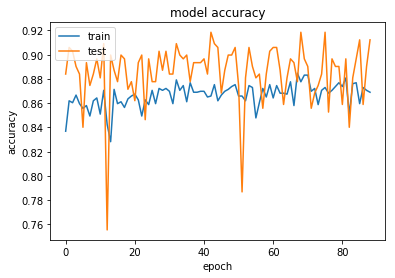

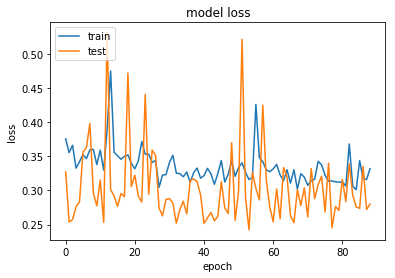

In [118]:
# last but not the least plotting the model performance

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()